In [1]:
from sys import path
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in path:
    path.insert(0, str(ROOT))
    print(f"Added {ROOT} to sys.path")

import pprint
from utils.dataset_loader import get_dataset_path, load_dataset, get_data_split
from utils.dataset_preprocessor import make_train_valid_split, to_spark_dfs, stop_spark_session, stratified_split_dataset
from batchtrainingbooster.trainers.catboost_trainer import CatBoostTrainer
from batchtrainingbooster.trainers.xgboost_trainer import XGBoostTrainer
from batchtrainingbooster.trainers.lightgbm_trainer import LGBMTrainer

print('Load Multiclass Dataset')
dataset_path = get_dataset_path("data/multiclass_dataset")
df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {df.shape}")
display(df.head())

print('*'*50)
print('*'*50)

print('Load Binary Dataset')

train_df = get_data_split("train")
print(f"Loaded training dataset: shape = {train_df.shape}")
display(train_df.head())


test_df = get_data_split("test")
print(f"Loaded test dataset: shape = {test_df.shape}")
display(test_df.head())


columns_todrop = ["Name", "PassengerId"]
train_df = train_df.drop(columns=columns_todrop)
test_df = test_df.drop(columns=columns_todrop)

print(f"Training dataset shape after dropping columns {columns_todrop}: {train_df.shape}")
print(f"Test dataset shape after dropping columns {columns_todrop}: {test_df.shape}")

#print('Split - Binary Dataset In Train/Valid and Transform in spark dataframe')
#print("Splitting training data into train and validation sets...")
#train_df, valid_df = make_train_valid_split(train_df,target='Survived', train_size = 0.8,val_size = 0.2,random_state=42)
#print(f"Train set shape: {train_df.shape}, Validation set shape: {valid_df.shape}")

#print("Converting pandas DataFrames to Spark DataFrames...")
#spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)



Added /Users/surelmanda/Data-Science-Projects/batchtrainingbooster to sys.path
Load Multiclass Dataset
Loaded dataset: ObesityDataset.csv, shape = (2111, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**************************************************
**************************************************
Load Binary Dataset
Loaded training dataset: shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loaded test dataset: shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Training dataset shape after dropping columns ['Name', 'PassengerId']: (891, 10)
Test dataset shape after dropping columns ['Name', 'PassengerId']: (418, 9)


In [2]:
print('Load Big Binary Dataset (Diabetes)')

print('Load Multiclass Dataset')
dataset_path = get_dataset_path("data/big_binary_dataset")
big_df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {big_df.shape}")
display(big_df.head())

train_df, valid_df, test_df = stratified_split_dataset(
    big_df,
    target_column="diabetes",
    train_ratio=0.6,
    valid_ratio=0.2,
    test_ratio=0.2,
    shuffle=True,
    random_state=123
)

print("Converting pandas DataFrames to Spark DataFrames...")
spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)
print("Pandas DataFrames successfully converted to Spark DataFrames.")

Load Big Binary Dataset (Diabetes)
Load Multiclass Dataset
Loaded dataset: binary_diabetes_dataset.csv, shape = (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Dataset split results:
 - Train set: (60000, 9) → 60000 samples, 2 distinct classes
 - Valid set: (20000, 9) → 20000 samples, 2 distinct classes
 - Test set : (20000, 9) → 20000 samples, 2 distinct classes
Converting pandas DataFrames to Spark DataFrames...


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/11 13:04:16 WARN Utils: Your hostname, MacBook-Air-di-Surel.local, resolves to a loopback address: 127.0.0.1; using 100.68.11.176 instead (on interface en0)
25/09/11 13:04:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/11 13:04:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[SPARK] Conversion successful → Spark DataFrames created.


[SPARK] Train rows: 60000 | Validation rows: 20000
Pandas DataFrames successfully converted to Spark DataFrames.


2025-09-11 13:04:34,644 - batchtrainingbooster.core.base_trainer - INFO - Validating input parameters
2025-09-11 13:04:34,684 - batchtrainingbooster.core.base_trainer - INFO - Preparing training data
2025-09-11 13:04:34,684 - batchtrainingbooster.core.base_trainer - INFO - Preparing validation data
2025-09-11 13:04:34,685 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Load Big Binary Dataset (Diabetes)
Importing CatBoostTrainer
===== Configuration CatBoost =====
{'loss_function': 'Logloss',
 'eval_metric': 'Logloss',
 'iterations': 100,
 'learning_rate': 0.01,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'auto_class_weights': 'Balanced',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.8,
 'random_seed': 42,
 'verbose': False}
Applying fit method


2025-09-11 13:04:35,707 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected in validation set
2025-09-11 13:04:35,709 - batchtrainingbooster.core.base_trainer - INFO - Number of categorical features identified: 2
2025-09-11 13:04:35,710 - batchtrainingbooster.core.base_trainer - INFO - Initializing training state for CatBoost
2025-09-11 13:04:35,710 - batchtrainingbooster.core.base_trainer - INFO - 🚀 Starting CatBoost training with 15 batches
2025-09-11 13:04:35,711 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-11 13:04:35,711 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-11 13:04:35,874 - batchtrainingbooster.core.base_trainer - INFO - Created 15 batches stratified by diabetes
2025-09-11 13:04:35,875 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-11 13:04:35,876 - batchtrainingbooster.core.base_trainer - INFO - Batches created and

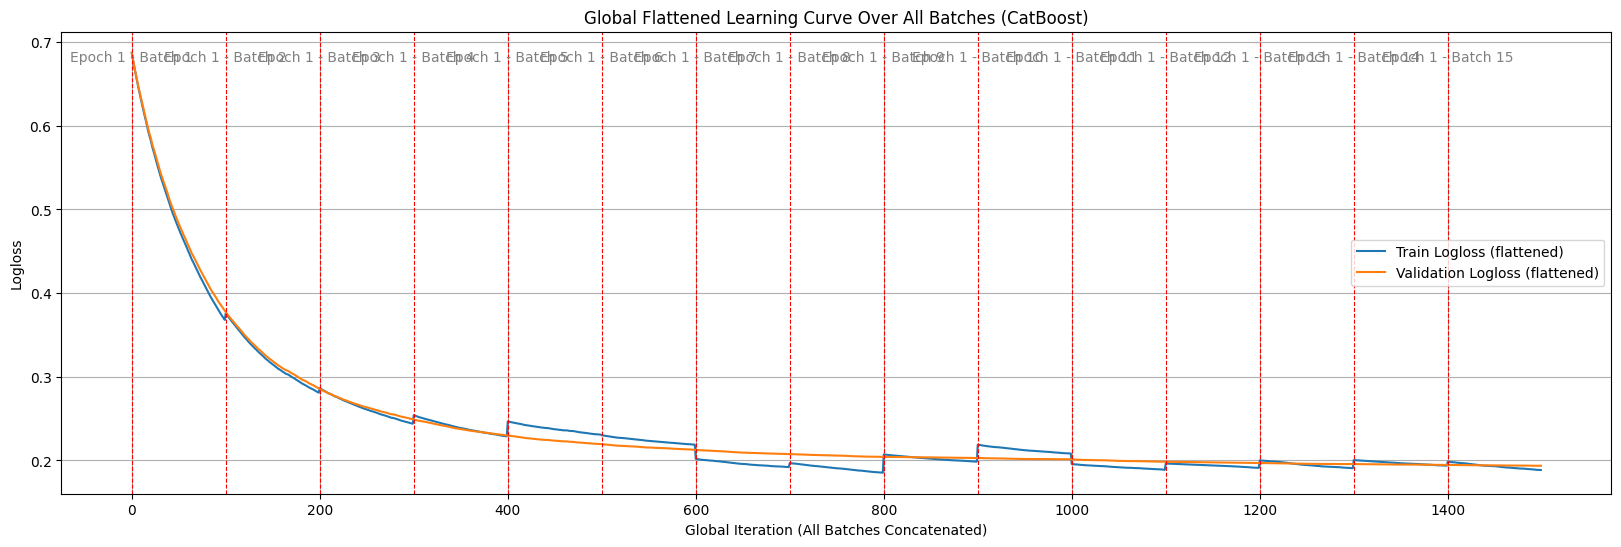

2025-09-11 13:04:54,206 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.
2025-09-11 13:04:54,207 - batchtrainingbooster.core.base_trainer - INFO - CatBoost training completed successfully!
2025-09-11 13:04:54,207 - batchtrainingbooster.core.base_trainer - INFO - Total batches processed: 15
2025-09-11 13:04:54,207 - batchtrainingbooster.core.base_trainer - INFO - Best validation loss: 0.19364
2025-09-11 13:04:54,208 - batchtrainingbooster.core.base_trainer - INFO - Using best model
2025-09-11 13:04:54,208 - batchtrainingbooster.core.base_trainer - INFO - Categorical features used: 2


In [3]:
print('Load Big Binary Dataset (Diabetes)')

# Définition de la colonne cible
target_column = "diabetes"

# Instanciation du trainer
print("Importing CatBoostTrainer")
trainer = CatBoostTrainer()
# print("CatBoostTrainer imported and instantiated successfully:", trainer)


# Binary class
config_model = {
    "loss_function": "Logloss",      # fonction de perte binaire
    "eval_metric": "Logloss",        # métrique d’évaluation choisie
    "iterations": 100,
    "learning_rate": 0.01,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",  # utile si classes déséquilibrées
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": False,
    #"early_stopping_rounds": 10,

}

config_training = {
    "num_batches": 15,             # nombre de lots pour l'entraînement
    "max_patience": 3,            # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}



print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training=config_training,
    config_model=config_model,
)

2025-09-11 09:41:15,424 - batchtrainingbooster.core.base_trainer - INFO - Validating input parameters...
2025-09-11 09:41:15,446 - batchtrainingbooster.core.base_trainer - INFO - Input parameters validation passed.
2025-09-11 09:41:15,447 - batchtrainingbooster.core.base_trainer - INFO - Preparing validation data...
2025-09-11 09:41:15,447 - batchtrainingbooster.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for validation.


Loading LGBMTrainer module...
LGBMTrainer imported and instantiated successfully: <batchtrainingbooster.trainers.lightgbm_trainer.LGBMTrainer object at 0x12b08d9d0>
===== Configuration XGBoost =====
{'objective': 'binary',
 'n_estimators': 10,
 'num_leaves': 30,
 'random_state': 42,
 'force_col_wise': True}
Applying fit method


2025-09-11 09:41:16,535 - batchtrainingbooster.core.base_trainer - INFO - Categorical features detected in validation set
2025-09-11 09:41:16,536 - batchtrainingbooster.core.base_trainer - INFO - Number of categorical features identified: 2
2025-09-11 09:41:16,536 - batchtrainingbooster.core.base_trainer - INFO - 🚀 Starting XGBoost training with 5 batches
2025-09-11 09:41:16,537 - batchtrainingbooster.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-11 09:41:16,537 - batchtrainingbooster.core.base_trainer - INFO - Creating batches...
2025-09-11 09:41:16,692 - batchtrainingbooster.core.base_trainer - INFO - Created 5 batches stratified by diabetes
2025-09-11 09:41:16,693 - batchtrainingbooster.core.base_trainer - INFO - Batches created successfully.
2025-09-11 09:41:16,693 - batchtrainingbooster.core.base_trainer - INFO - Batches created and applied to DataFrame.
2025-09-11 09:41:16,694 - batchtrainingbooster.core.base_trainer - INFO - Filtering and process

[LightGBM] [Info] Number of positive: 1020, number of negative: 10980
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


2025-09-11 09:41:20,997 - batchtrainingbooster.core.base_trainer - INFO - 
--- Processing batch 2/5 ---
2025-09-11 09:41:20,998 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 2
2025-09-11 09:41:21,002 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 3: 0.056250
2025-09-11 09:41:21,003 - batchtrainingbooster.core.base_trainer - INFO - Mise à jour du modèle LGBM.
2025-09-11 09:41:21,003 - batchtrainingbooster.core.base_trainer - INFO - LGBMClassifier configuration
2025-09-11 09:41:21,003 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training LGBM on batch 2
2025-09-11 09:41:21,092 - batchtrainingbooster.core.base_trainer - INFO - Batch 2 - Train (last): 0.10813 | Valid (last): 0.11110
2025-09-11 09:41:21,092 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.11110 (improvement: 0.02748)
2025-09-11 09:41:21,094 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 

[LightGBM] [Info] Number of positive: 1020, number of negative: 10980
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8


2025-09-11 09:41:22,263 - batchtrainingbooster.core.base_trainer - INFO - 
--- Processing batch 3/5 ---
2025-09-11 09:41:22,266 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 3
2025-09-11 09:41:22,269 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 4: 0.042188
2025-09-11 09:41:22,269 - batchtrainingbooster.core.base_trainer - INFO - Mise à jour du modèle LGBM.
2025-09-11 09:41:22,270 - batchtrainingbooster.core.base_trainer - INFO - LGBMClassifier configuration
2025-09-11 09:41:22,270 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training LGBM on batch 3
2025-09-11 09:41:22,341 - batchtrainingbooster.core.base_trainer - INFO - Batch 3 - Train (last): 0.09427 | Valid (last): 0.09932
2025-09-11 09:41:22,341 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.09932 (improvement: 0.01178)
2025-09-11 09:41:22,342 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 

[LightGBM] [Info] Number of positive: 1020, number of negative: 10980
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8


2025-09-11 09:41:23,385 - batchtrainingbooster.core.base_trainer - INFO - 
--- Processing batch 4/5 ---
2025-09-11 09:41:23,386 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 4
2025-09-11 09:41:23,390 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 5: 0.031641
2025-09-11 09:41:23,390 - batchtrainingbooster.core.base_trainer - INFO - Mise à jour du modèle LGBM.
2025-09-11 09:41:23,390 - batchtrainingbooster.core.base_trainer - INFO - LGBMClassifier configuration
2025-09-11 09:41:23,391 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training LGBM on batch 4
2025-09-11 09:41:23,464 - batchtrainingbooster.core.base_trainer - INFO - Batch 4 - Train (last): 0.09459 | Valid (last): 0.09404
2025-09-11 09:41:23,465 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.09404 (improvement: 0.00529)
2025-09-11 09:41:23,466 - batchtrainingbooster.core.base_trainer - INFO - Filtering and processing batch 

[LightGBM] [Info] Number of positive: 1020, number of negative: 10980
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8


2025-09-11 09:41:24,315 - batchtrainingbooster.core.base_trainer - INFO - 
--- Processing batch 5/5 ---
2025-09-11 09:41:24,316 - batchtrainingbooster.core.base_trainer - INFO - Calculating sample weights for batch 5
2025-09-11 09:41:24,319 - batchtrainingbooster.core.base_trainer - INFO - Learning rate for batch 6: 0.023730
2025-09-11 09:41:24,320 - batchtrainingbooster.core.base_trainer - INFO - Mise à jour du modèle LGBM.
2025-09-11 09:41:24,320 - batchtrainingbooster.core.base_trainer - INFO - LGBMClassifier configuration
2025-09-11 09:41:24,321 - batchtrainingbooster.core.base_trainer - INFO - 🏋️ Training LGBM on batch 5
2025-09-11 09:41:24,449 - batchtrainingbooster.core.base_trainer - INFO - Batch 5 - Train (last): 0.08831 | Valid (last): 0.09092
2025-09-11 09:41:24,450 - batchtrainingbooster.core.base_trainer - INFO - New best validation loss: 0.09092 (improvement: 0.00311)
2025-09-11 09:41:24,452 - batchtrainingbooster.core.base_trainer - INFO - clean the cache of OptimizedWei

[LightGBM] [Info] Number of positive: 1020, number of negative: 10980
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 8


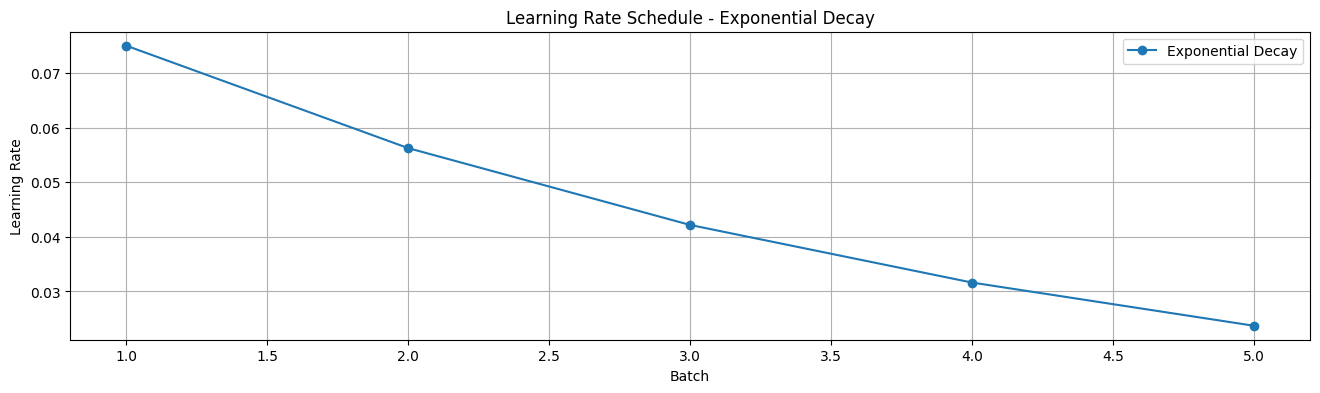

2025-09-11 09:41:24,554 - batchtrainingbooster.core.base_trainer - INFO - Plotting learning curve of LGBM model...


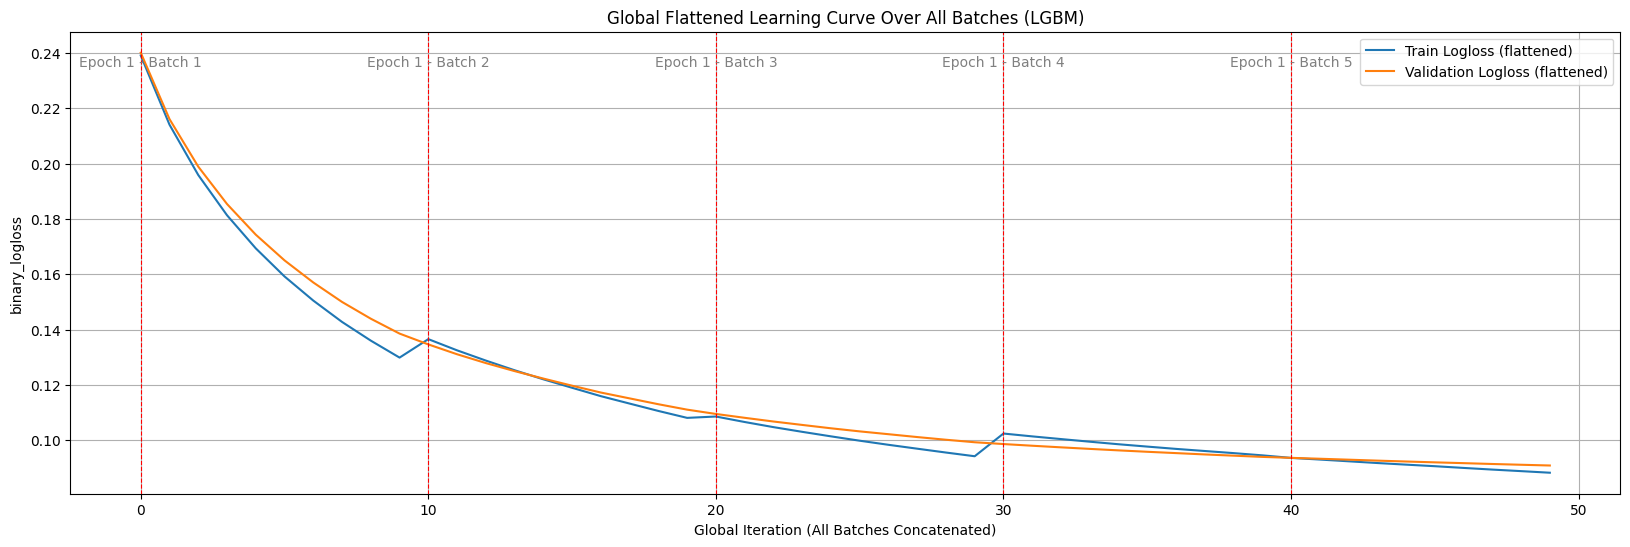

2025-09-11 09:41:24,633 - batchtrainingbooster.core.base_trainer - INFO - Learning curve plotted successfully.


In [3]:
print("Loading LGBMTrainer module...")
trainer = LGBMTrainer() # lightgbm.LGBMClassifier
print("LGBMTrainer imported and instantiated successfully:", trainer)

target_column = "diabetes"

# Binaire
config_model = {
    "objective": "binary",         # LightGBM -> "binary" pour classification binaire
    #"metric": "binary_logloss",    # métriques natives LightGBM
    "n_estimators": 10,            # nombre d’arbres
    "num_leaves": 30,
    #"learning_rate": 0.05,        # taux d’apprentissage
    #"max_depth": 6,                # profondeur max
    #"reg_lambda": 3.0,             # régularisation L2
    #"subsample": 0.8,              # échantillonnage des données
    #"colsample_bytree": 0.8,       # échantillonnage des features
    "random_state": 42,            # graine
    "force_col_wise":True,
    #"early_stopping_rounds": 10    # utilisé dans .fit() avec validation
}

config_lr_scheduler = {
    "initial_lr": 0.1,
    "decay_rate": 0.75,
    "min_lr": 1e-3,
}

config_training = {
    "num_batches": 5,   # nombre de lots pour l'entraînement
    "max_patience": 3,  # patience pour early stopping global
    "eval_metric":"binary_logloss", # 
    "show_learning_curve": True,    # afficher la courbe d'apprentissage
    "use_sample_weight": False,      #
}

print("===== Configuration XGBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training = config_training,
    config_model=config_model,
    config_lr_scheduler=config_lr_scheduler,
)

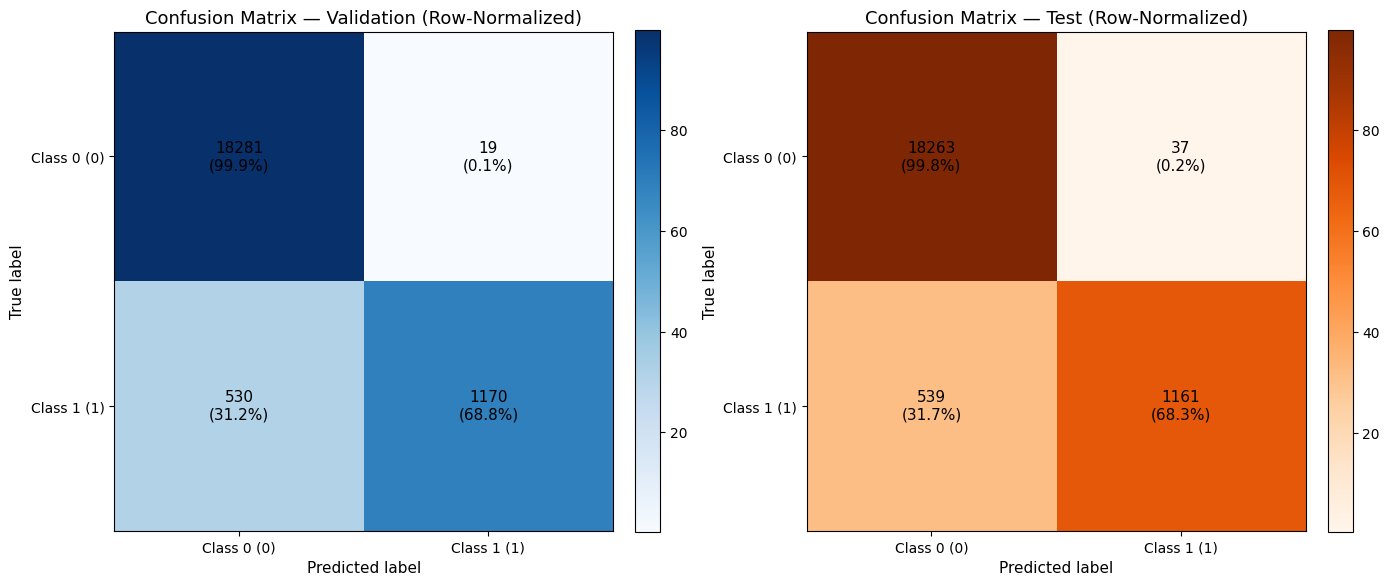

Learning rates par batch: ['0.10000', '0.08500', '0.07225', '0.06141', '0.05220', '0.04437', '0.03771', '0.03206', '0.02725', '0.02316']


In [7]:
final_model = trainer.get_trained_model()
# ================================
# Évaluation Validation + Test
# ================================
# IMPORTANT: prédire avec les mêmes dtypes/catégories (déjà alignés ci-dessus)
y_pred_valid = final_model.predict(X_valid)
y_pred_test  = final_model.predict(X_test)

results_valid_df = make_results_df(y_valid, y_pred_valid)
results_test_df  = make_results_df(y_test,  y_pred_test)

plot_confusion_valid_and_test_row_normalized(
    results_valid_df,
    results_test_df,
    label_order=(0,1),
    class_labels=("Class 0 (0)", "Class 1 (1)")
)

# (optionnel) afficher la séquence des LR utilisés
print("Learning rates par batch:", [f"{v:.5f}" for v in lrs_used])

In [6]:
# Early stopping global
if val_loss < best_val_loss:
    print(f"👍 - New best validation loss achieved: {val_loss:.4f} (previous best: {best_val_loss:.4f})")
    best_val_loss = val_loss
    patience_counter = 0
    best_model = deepcopy(booster)
else:
    print(f"👎 - No improvement in the validation log loss. Patience counter: {patience_counter}/{max_patience}")
    patience_counter += 1
    if patience_counter >= max_patience:
        print("⏳ - Global early stopping triggered after reaching maximum patience.")
        #return best_model  # Return the best model found before early stopping
        break

SyntaxError: 'break' outside loop (1461137935.py, line 13)

Batch 01 → lr=0.10000 | X_b=(6000, 8) | pos%=0.0850
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
Batch 02 → lr=0.08500 | X_b=(6000, 8) | pos%=0.0850
[LightGBM] [Info] Number of positive: 510, number of negative: 5490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info]

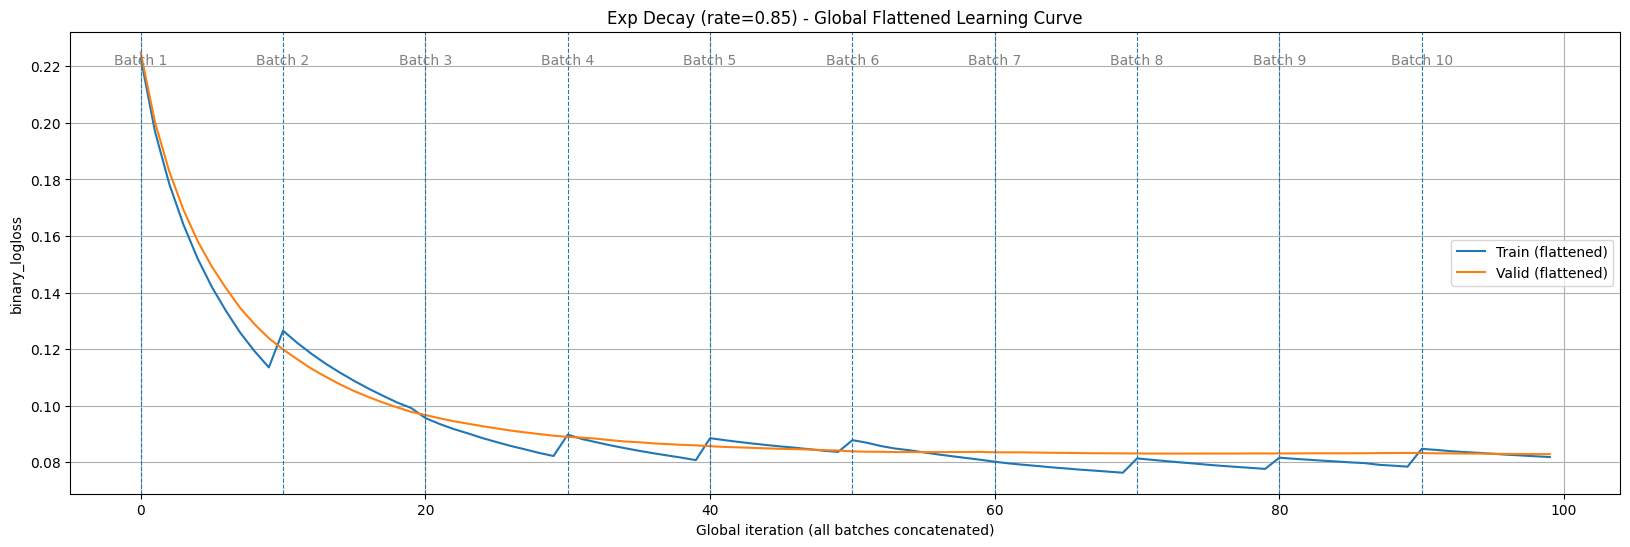

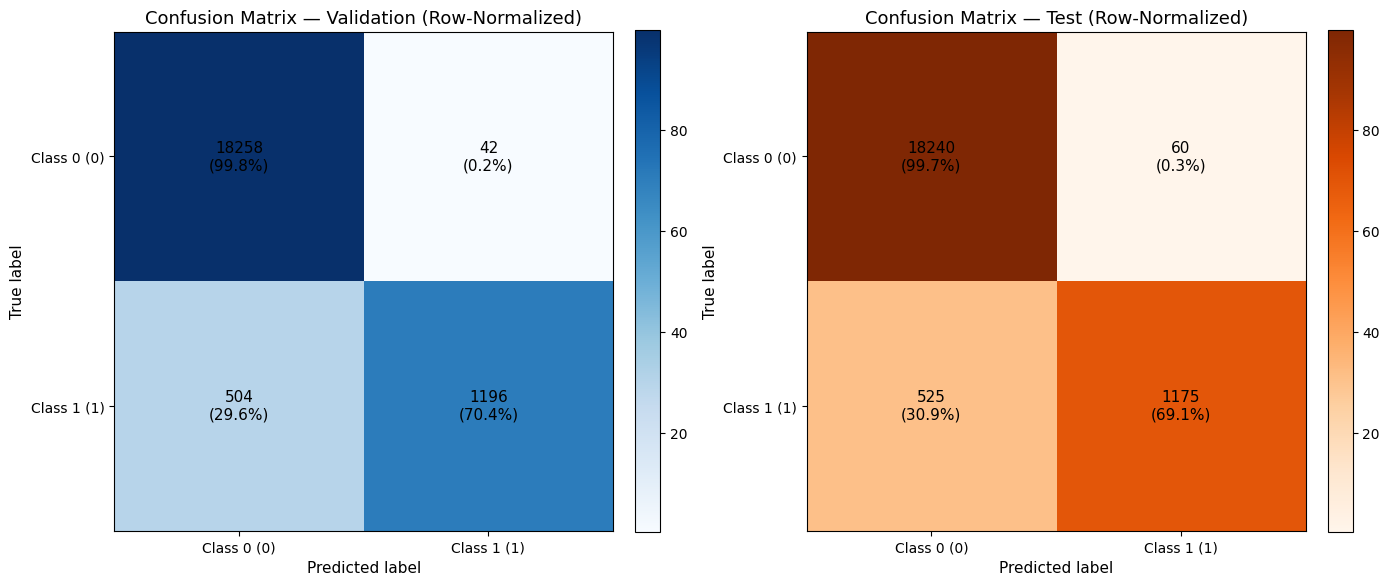

Learning rates par batch: ['0.10000', '0.08500', '0.07225', '0.06141', '0.05220', '0.04437', '0.03771', '0.03206', '0.02725', '0.02316']


In [6]:
# ================================
# Imports & utils
# ================================
import pandas as pd
import numpy as np
from copy import deepcopy
from typing import List, Tuple, Union, Iterator
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def get_categorical_features(X: pd.DataFrame) -> Tuple[List[str], List[int]]:
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    cat_idx = [X.columns.get_loc(col) for col in cat_cols]
    return cat_cols, cat_idx

def make_batches(
    X: Union[pd.DataFrame, np.ndarray],
    y: Union[pd.Series, np.ndarray],
    n_batches: int = 5,
    seed: int = 42,
    shuffle: bool = True
) -> Iterator[Tuple[int, Union[pd.DataFrame, np.ndarray], Union[pd.Series, np.ndarray]]]:
    y_arr = y.values if isinstance(y, (pd.Series, pd.DataFrame)) else y
    X_arr = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X
    skf = StratifiedKFold(n_splits=n_batches, shuffle=shuffle, random_state=seed)
    for i, (_, batch_idx) in enumerate(skf.split(X_arr, y_arr), start=1):
        X_b = X.iloc[batch_idx] if isinstance(X, pd.DataFrame) else X[batch_idx]
        y_b = y.iloc[batch_idx] if isinstance(y, pd.Series) else y[batch_idx]
        yield i, X_b, y_b

# -- aligner les catégories entre splits pour éviter les bugs de codes internes
from pandas.api.types import CategoricalDtype
def align_categoricals(X_train: pd.DataFrame, X_valid: pd.DataFrame, X_test: pd.DataFrame, cat_cols: List[str]):
    for col in cat_cols:
        # union des catégories présentes sur tous les splits
        cats = pd.Index(
            pd.concat([
                X_train[col].astype(str),
                X_valid[col].astype(str),
                X_test[col].astype(str)
            ], ignore_index=True).unique()
        ).sort_values()
        ctype = CategoricalDtype(categories=cats)
        X_train[col] = X_train[col].astype(ctype)
        X_valid[col] = X_valid[col].astype(ctype)
        X_test[col]  = X_test[col].astype(ctype)
    return X_train, X_valid, X_test

# -- plot générique (valid + test) normalisé par ligne
def plot_confusion_valid_and_test_row_normalized(
    results_valid_df, results_test_df,
    *, label_order=(0,1), class_labels=("Class 0 (0)", "Class 1 (1)")
):
    def plot_one(ax, y_true, y_pred, title, cmap):
        cm = confusion_matrix(y_true, y_pred, labels=list(label_order))
        row_sums = cm.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1
        cmn = cm / row_sums * 100.0
        im = ax.imshow(cmn, interpolation='nearest', cmap=cmap)
        ax.set_title(title, fontsize=13)
        ax.set_xlabel("Predicted label", fontsize=11)
        ax.set_ylabel("True label", fontsize=11)
        ax.set_xticks([0,1]); ax.set_yticks([0,1])
        ax.set_xticklabels(class_labels); ax.set_yticklabels(class_labels)
        for i in range(2):
            for j in range(2):
                ax.text(j, i, f"{cm[i,j]}\n({cmn[i,j]:.1f}%)", ha="center", va="center", fontsize=11, color="black")
        plt.colorbar(im, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    plot_one(axes[0], results_valid_df["ground_true"], results_valid_df["prediction"],
             "Confusion Matrix — Validation (Row-Normalized)", cmap="Blues")
    plot_one(axes[1], results_test_df["ground_true"],  results_test_df["prediction"],
             "Confusion Matrix — Test (Row-Normalized)", cmap="Oranges")
    plt.tight_layout(); plt.show()

def make_results_df(y_true, y_pred):
    return pd.DataFrame({"ground_true": np.asarray(y_true), "prediction": np.asarray(y_pred)})

# ================================
# Données (split)
# ================================
target_column = "diabetes"
X_train = train_df.drop(columns=[target_column]).copy()
y_train = train_df[target_column].astype(int).copy()

X_valid = valid_df.drop(columns=[target_column]).copy()
y_valid = valid_df[target_column].astype(int).copy()

X_test  = test_df.drop(columns=[target_column]).copy()
y_test  = test_df[target_column].astype(int).copy()

# Categorical handling
cat_cols, _ = get_categorical_features(X_train)
# caster & aligner entre splits
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")
    X_test[col]  = X_test[col].astype("category")
X_train, X_valid, X_test = align_categoricals(X_train, X_valid, X_test, cat_cols)

# ================================
# Exponential Decay training
# ================================
n_batches      = 10
random_state   = 42
initial_lr     = 0.1
decay_rate     = 0.85         # <-- ajuste ici le facteur de décroissance
min_lr         = 1e-3

# paramètres invariants par batch (on ne change que learning_rate)
base_params = dict(
    objective="binary",
    n_estimators=10,          # nb d’arbres ajoutés à chaque batch
    num_leaves=15,
    random_state=random_state
)

global_train_loss: list[list[float]] = []
global_valid_loss: list[list[float]] = []
metric_name = "binary_logloss"
previous_model = None
lrs_used = []

def lr_for_batch(b: int) -> float:
    # lr_b = max(min_lr, initial_lr * decay_rate**(b-1))
    return max(min_lr, initial_lr * (decay_rate ** (b - 1)))

for b, X_b, y_b in make_batches(X_train, y_train, n_batches=n_batches, seed=random_state, shuffle=True):
    lr_b = lr_for_batch(b)
    lrs_used.append(lr_b)
    params_b = {**base_params, "learning_rate": lr_b}
    print(f"Batch {b:02d} → lr={lr_b:.5f} | X_b={X_b.shape} | pos%={y_b.mean():.4f}")

    model = LGBMClassifier(**params_b)
    model.fit(
        X_b, y_b,
        eval_set=[(X_b, y_b), (X_valid, y_valid)],
        eval_names=["train", "valid"],
        eval_metric="logloss",
        categorical_feature=cat_cols if len(cat_cols) > 0 else "auto",
        init_model=previous_model if previous_model is not None else None
    )
    previous_model = deepcopy(model)

    evals = model.evals_result_
    # keys cohérentes avec eval_names=["train","valid"]
    train_curve = evals["train"]["binary_logloss"]
    valid_curve = evals["valid"]["binary_logloss"]
    global_train_loss.append(train_curve)
    global_valid_loss.append(valid_curve)

# modèle final cumulé (après le dernier batch)
final_model = previous_model

# ================================
# Courbe d'apprentissage (aplatie)
# ================================
flattened_train_loss = [loss for curve in global_train_loss for loss in curve]
flattened_val_loss   = [loss for curve in global_valid_loss   for loss in curve]
batch_start_indices  = np.cumsum([0] + [len(c) for c in global_train_loss[:-1]])

plt.figure(figsize=(20,6))
plt.plot(flattened_train_loss, label="Train (flattened)")
plt.plot(flattened_val_loss,   label="Valid (flattened)")
ax = plt.gca()
for i, x in enumerate(batch_start_indices, start=1):
    ax.axvline(x=x, color="tab:blue", linestyle="--", linewidth=0.8)
    ax.text(x, ax.get_ylim()[1]*0.95, f"Batch {i}", ha="center", color="gray")
plt.title(f"Exp Decay (rate={decay_rate}) - Global Flattened Learning Curve")
plt.xlabel("Global iteration (all batches concatenated)")
plt.ylabel("binary_logloss")
plt.legend(); plt.grid(True); plt.show()

# ================================
# Évaluation Validation + Test
# ================================
# IMPORTANT: prédire avec les mêmes dtypes/catégories (déjà alignés ci-dessus)
y_pred_valid = final_model.predict(X_valid)
y_pred_test  = final_model.predict(X_test)

results_valid_df = make_results_df(y_valid, y_pred_valid)
results_test_df  = make_results_df(y_test,  y_pred_test)

plot_confusion_valid_and_test_row_normalized(
    results_valid_df,
    results_test_df,
    label_order=(0,1),
    class_labels=("Class 0 (0)", "Class 1 (1)")
)

# (optionnel) afficher la séquence des LR utilisés
print("Learning rates par batch:", [f"{v:.5f}" for v in lrs_used])


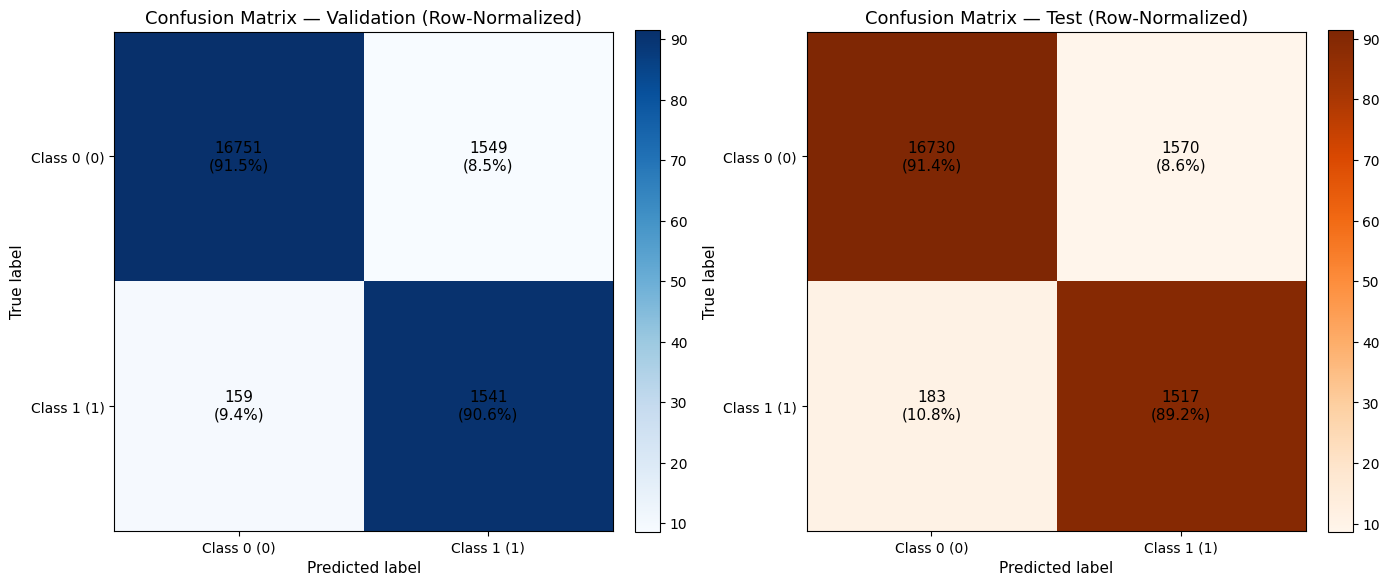

Learning rates par batch: ['0.10000', '0.08500', '0.07225', '0.06141', '0.05220', '0.04437', '0.03771', '0.03206', '0.02725', '0.02316']


In [8]:
final_model = trainer.get_model()
# ================================
# Évaluation Validation + Test
# ================================
# IMPORTANT: prédire avec les mêmes dtypes/catégories (déjà alignés ci-dessus)
y_pred_valid = final_model.predict(X_valid)
y_pred_test  = final_model.predict(X_test)

results_valid_df = make_results_df(y_valid, y_pred_valid)
results_test_df  = make_results_df(y_test,  y_pred_test)

plot_confusion_valid_and_test_row_normalized(
    results_valid_df,
    results_test_df,
    label_order=(0,1),
    class_labels=("Class 0 (0)", "Class 1 (1)")
)

# (optionnel) afficher la séquence des LR utilisés
print("Learning rates par batch:", [f"{v:.5f}" for v in lrs_used])

In [9]:
# Récupérer la session Spark active
spark = spark_train_df.sparkSession

# Stopper Spark
stop_spark_session(spark)

[SPARK] Stopping Spark session...
[SPARK] Session stopped successfully.


In [ ]:
# Définition de la colonne cible
target_column = "Survived"

# Instanciation du trainer
print("Importing CatBoostTrainer")
trainer = CatBoostTrainer()
# print("CatBoostTrainer imported and instantiated successfully:", trainer)


# Binary class
config_model = {
    "loss_function": "Logloss",      # fonction de perte binaire
    "eval_metric": "Logloss",        # métrique d’évaluation choisie
    "iterations": 100,
    "learning_rate": 0.01,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",  # utile si classes déséquilibrées
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,
    "early_stopping_rounds": 10,
    #"use_best_model": True,
}

config_training = {
    "num_batches": 2,  # nombre de lots pour l'entraînement
    "max_patience": 5,  # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training=config_training,
    config_model=config_model,
)

In [ ]:
print("Importing XGBoostTrainer")
trainer = XGBoostTrainer()
print("XGBoostTrainer imported and instantiated successfully:", trainer)

target_column = "Survived"

# Binaire
config_model = {
    "objective": "binary:logistic",   # classification binaire #binary:logitraw #binary:logistic 
    "eval_metric": "logloss", #["auc", "logloss"],  # suivre AUC et logloss
    "n_estimators": 300,              # équivalent à iterations
    "learning_rate": 0.05,
    "max_depth": 6,
    "reg_lambda": 3.0,                # l2_leaf_reg -> reg_lambda
    "subsample": 0.8,
    "colsample_bytree": 0.8,          # sous-échantillonnage des features
    "random_state": 42,
    #"verbosity": 1,                   # 0 = silent, 1 = warnings
    #"verbose": 10,                   # 0 = silent, 1 = warnings
    "early_stopping_rounds": 10,      # géré via fit()
}

config_lr_scheduler = {
    "initial_lr": 0.1,
    "decay_rate": 0.20,
}

config_training = {
    "num_batches": 3,  # nombre de lots pour l'entraînement
    "max_patience": 5,  # patience pour early stopping global
    "show_learning_curve": True,  # afficher la courbe d'apprentissage
}

print("===== Configuration XGBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    config_training = config_training,
    config_model=config_model,
    config_lr_scheduler=config_lr_scheduler,
)


In [ ]:
# Récupérer la session Spark active
spark = spark_train_df.sparkSession

# Stopper Spark
stop_spark_session(spark)

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Cette version est binaire. Reçu {y.nunique()} classes.")
    if set(y.unique()) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy, le


def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés, avec logs de métriques par batch.
    Retourne un dict { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # --- split X / y
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # --- encoder binaire
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index)
        if le is not None else y_valid.astype(int)
    )

    # --- params de base
    params = {
        "objective": "binary",
        "metric": ["binary_logloss", "auc"],
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # --- créer les batches (on mélange pour debug lisible mais reproductible)
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx]
        )
        valid_data = lgb.Dataset(X_valid, label=y_valid_enc, reference=train_data)

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # --- prédictions & métriques
        proba_valid = model.predict(X_valid)
        proba_train = model.predict(X_train.iloc[cum_idx])

        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        # robustesse si AUC impossible (y_valid constant)
        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),

                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,
        }
        results["reports"].append(report)
        results["models"].append(model)

        # --- logs console minimalistes
        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, auc_v={m['auc_valid']:.4f}, "
              f"acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # petit résumé final
    def key_auc_then_acc(r):  # maximise AUC puis accuracy
        return (-(r["metrics"]["auc_valid"] if not np.isnan(r["metrics"]["auc_valid"]) else -1e9),
                -r["metrics"]["accuracy_valid"])
    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} (AUC={best['metrics']['auc_valid']:.4f}, "
          f"Acc={best['metrics']['accuracy_valid']:.4f})")

    return results



# Exemple d’appel (en supposant que vos DataFrames existent déjà)
target_column = "Survived"
res = train_lgbm_binary_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    label_col=target_column,
    n_batches=5,
    num_boost_round=200,
    early_stopping_rounds=30,
)

# Récupérer le dernier modèle entraîné (après le dernier batch)
last_model = res["models"][-1]

# Voir les métriques par batch
for r in res["reports"]:
    print(r["batch"], r["cumulative_samples"], r["metrics"])


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Cette version est binaire. Reçu {y.nunique()} classes.")
    # déjà 0/1 ?
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """
    Convertit les colonnes object/category en category et aligne les catégories
    entre train et valid. Convertit les bool en int. Retourne (X_train, X_valid, cat_cols).
    """
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    # colonnes catégorielles (object ou category)
    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

    # Aligner les catégories entre train et valid
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories  # catégories apprises sur le train
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)  # inconnues -> NaN

    # bool -> int (LightGBM accepte bool, mais on uniformise)
    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés, avec logs de métriques par batch.
    Retourne un dict { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # --- split X / y
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # --- encoder labels en {0,1}
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le is not None else y_valid.astype(int)
    )

    # --- préparer features pour LightGBM (catégorielles/booleans)
    X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

    # --- params de base LightGBM
    params = {
        "objective": "binary",
        "metric": ["binary_logloss", "auc"],
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # --- créer les batches (shuffle reproductible)
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx],
            categorical_feature=cat_cols
        )
        valid_data = lgb.Dataset(
            X_valid,
            label=y_valid_enc,
            reference=train_data,
            categorical_feature=cat_cols
        )

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # --- prédictions & métriques
        proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
        proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)

        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        # robustesse si AUC impossible (y_valid constant)
        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,
        }
        results["reports"].append(report)
        results["models"].append(model)

        # logs console
        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, auc_v={m['auc_valid']:.4f}, "
              f"acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # Meilleur batch = maximise AUC puis accuracy
    def key_auc_then_acc(r):
        auc = r["metrics"]["auc_valid"]
        return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} (AUC={best['metrics']['auc_valid']:.4f}, "
          f"Acc={best['metrics']['accuracy_valid']:.4f})")

    return results


# ----------- Exemple d'utilisation -----------
target_column = "Survived"
res = train_lgbm_binary_in_batches(
     train_df=train_df,
     valid_df=valid_df,
     label_col=target_column,
     n_batches=5,
     num_boost_round=200,
     early_stopping_rounds=30,
 )
last_model = res["models"][-1]
for r in res["reports"]:
     print(r["batch"], r["cumulative_samples"], r["metrics"])



In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Cette version est binaire. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category et aligne train/valid. Bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés.
    Retourne { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # split
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # labels {0,1}
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le is not None else y_valid.astype(int)
    )

    # features catégorielles
    X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

    # params LightGBM
    params = {
        "objective": "binary",
        "metric": ["binary_logloss", "auc"],
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # batches
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx],
            categorical_feature=cat_cols
        )
        valid_data = lgb.Dataset(
            X_valid,
            label=y_valid_enc,
            reference=train_data,
            categorical_feature=cat_cols
        )

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # prédictions
        proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
        proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,
        }
        results["reports"].append(report)
        results["models"].append(model)

        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, auc_v={m['auc_valid']:.4f}, "
              f"acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # meilleur batch
    def key_auc_then_acc(r):
        auc = r["metrics"]["auc_valid"]
        return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
          f"(AUC={best['metrics']['auc_valid']:.4f}, "
          f"Acc={best['metrics']['accuracy_valid']:.4f})")

    return results


# --- fonction de plot ---
def plot_learning_curves_per_batch(results, figsize=(12, 5)):
    """
    Affiche les courbes train/valid pour binary_logloss et AUC à chaque batch.
    """
    n_batches = len(results["reports"])
    fig, axes = plt.subplots(n_batches, 2, figsize=(figsize[0], figsize[1]*n_batches))

    if n_batches == 1:
        axes = np.array([axes])  # homogénéité

    for i, r in enumerate(results["reports"]):
        evals = r["evals_result"]

        # LogLoss
        ax1 = axes[i, 0]
        ax1.plot(evals["train"]["binary_logloss"], label="train")
        ax1.plot(evals["valid"]["binary_logloss"], label="valid")
        ax1.set_title(f"Batch {r['batch']} - Binary LogLoss")
        ax1.set_xlabel("Iteration"); ax1.set_ylabel("LogLoss")
        ax1.legend(); ax1.grid(True, alpha=0.3)

        # AUC
        ax2 = axes[i, 1]
        ax2.plot(evals["train"]["auc"], label="train")
        ax2.plot(evals["valid"]["auc"], label="valid")
        ax2.set_title(f"Batch {r['batch']} - AUC")
        ax2.set_xlabel("Iteration"); ax2.set_ylabel("AUC")
        ax2.legend(); ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()



target_column = "Survived"
res = train_lgbm_binary_in_batches(
    train_df=train_df,
    valid_df=valid_df,
    label_col=target_column,
    n_batches=3,
    num_boost_round=200,
    early_stopping_rounds=30,
)

plot_learning_curves_per_batch(res)


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, log_loss
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# ---------- Utils ----------
def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category, aligne train/valid, bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


# ---------- Entraînement ----------
def train_lgbm_binary_in_batches(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_col: str,
    n_batches: int = 5,
    num_boost_round: int = 300,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
    lgb_params: dict | None = None,
):
    """
    Entraînement LightGBM binaire en batches cumulés (éval = binary_logloss uniquement).
    Retourne { 'reports': [...], 'models': [...], 'label_encoder': le }.
    """
    # split
    X_train = train_df.drop(columns=[label_col])
    y_train = train_df[label_col]
    X_valid = valid_df.drop(columns=[label_col])
    y_valid = valid_df[label_col]

    # labels {0,1}
    y_train_enc, le = _ensure_binary_labels(y_train)
    y_valid_enc = (
        pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
        if le is not None else y_valid.astype(int)
    )

    # features
    X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

    # params LightGBM : **UNE SEULE metric d'éval**
    params = {
        "objective": "binary",
        "metric": ["binary_logloss"],   # <- eval unique
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    if lgb_params:
        params.update(lgb_params)

    # batches
    rng = np.random.default_rng(random_state)
    idx = np.arange(len(X_train))
    rng.shuffle(idx)
    batches_idx = np.array_split(idx, n_batches)

    results = {"reports": [], "models": [], "label_encoder": le}

    cum_idx = np.array([], dtype=int)
    print("=== DÉBUT: entraînement binaire par batches ===")
    for b, b_idx in enumerate(batches_idx, start=1):
        cum_idx = np.concatenate([cum_idx, b_idx])

        train_data = lgb.Dataset(
            X_train.iloc[cum_idx],
            label=y_train_enc.iloc[cum_idx],
            categorical_feature=cat_cols
        )
        valid_data = lgb.Dataset(
            X_valid,
            label=y_valid_enc,
            reference=train_data,
            categorical_feature=cat_cols
        )

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.record_evaluation(evals_result),
            ],
        )

        # prédictions & métriques finales (pour reporting)
        proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
        proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
        pred_valid = (proba_valid >= 0.5).astype(int)
        pred_train = (proba_train >= 0.5).astype(int)

        try:
            auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
        except Exception:
            auc_v = np.nan

        report = {
            "batch": b,
            "cumulative_samples": int(len(cum_idx)),
            "best_iteration": int(model.best_iteration),
            "metrics": {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
                "auc_valid": auc_v,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
                "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
            },
            "evals_result": evals_result,  # contient 'train'/'valid' -> 'binary_logloss' par itération
        }
        results["reports"].append(report)
        results["models"].append(model)

        m = report["metrics"]
        print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
              f"best_iter={report['best_iteration']}, "
              f"logloss_v={m['logloss_valid']:.4f}, "
              f"auc_v={m['auc_valid']:.4f}, acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

    # meilleur batch (max AUC puis accuracy)
    def key_auc_then_acc(r):
        auc = r["metrics"]["auc_valid"]
        return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

    best = sorted(results["reports"], key=key_auc_then_acc)[0]
    print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
          f"(AUC={best['metrics']['auc_valid']:.4f}, Acc={best['metrics']['accuracy_valid']:.4f})")

    return results


# ---------- Plot unique : concaténation logloss train/valid ----------
def plot_concatenated_logloss(results, gap_points: int = 5, show_batch_boundaries: bool = True, figsize=(12,4)):
    """
    Concatène bout-à-bout les courbes 'binary_logloss' de train et valid pour tous les batches,
    et les trace sur un seul graphique. Ajoute des lignes verticales aux fins de batch.
    """
    concat_train, concat_valid = [], []
    batch_end_positions = []

    for i, r in enumerate(results["reports"], start=1):
        evals = r["evals_result"]
        tr = evals["train"]["binary_logloss"]
        va = evals["valid"]["binary_logloss"]

        concat_train.extend(tr)
        concat_valid.extend(va)
        batch_end_positions.append(len(concat_train) - 1)

        if i < len(results["reports"]) and gap_points > 0:
            concat_train.extend([np.nan] * gap_points)
            concat_valid.extend([np.nan] * gap_points)

    x = np.arange(len(concat_train))
    plt.figure(figsize=figsize)
    plt.plot(x, concat_train, label="train logloss")
    plt.plot(x, concat_valid, label="valid logloss")
    plt.title("Binary LogLoss — concaténation des batches (train vs valid)")
    plt.xlabel("Itérations concaténées")
    plt.ylabel("LogLoss")
    plt.grid(True, alpha=0.3)
    plt.legend()

    if show_batch_boundaries:
        for j, pos in enumerate(batch_end_positions, start=1):
            plt.axvline(pos, linestyle="--", alpha=0.4)
            # petit label en bas
            ymin, _ = plt.gca().get_ylim()
            plt.text(pos, ymin, f"B{j}", va="bottom", ha="right", rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# ---------- Exemple d'utilisation ----------
target_column = "Survived"
res = train_lgbm_binary_in_batches(
     train_df=train_df,
     valid_df=valid_df,
     label_col=target_column,
     n_batches=5,
     num_boost_round=200,
     early_stopping_rounds=30,
 )
plot_concatenated_logloss(res, gap_points=5, show_batch_boundaries=True)


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# ---------- Utils minimales ----------
def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category, aligne train/valid, bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


# ---------- Plot unique : concaténation logloss train/valid ----------
def plot_concatenated_logloss(results, gap_points: int = 5, show_batch_boundaries: bool = True, figsize=(12,4)):
    """
    Concatène bout-à-bout les courbes 'binary_logloss' de train et valid pour tous les batches,
    et les trace sur un seul graphique. Ajoute des lignes verticales aux fins de batch.
    """
    concat_train, concat_valid = [], []
    batch_end_positions = []

    for i, r in enumerate(results["reports"], start=1):
        evals = r["evals_result"]
        tr = evals["train"]["binary_logloss"]
        va = evals["valid"]["binary_logloss"]

        concat_train.extend(tr)
        concat_valid.extend(va)
        batch_end_positions.append(len(concat_train) - 1)

        if i < len(results["reports"]) and gap_points > 0:
            concat_train.extend([np.nan] * gap_points)
            concat_valid.extend([np.nan] * gap_points)

    x = np.arange(len(concat_train))
    plt.figure(figsize=figsize)
    plt.plot(x, concat_train, label="train logloss")
    plt.plot(x, concat_valid, label="valid logloss")
    plt.title("Binary LogLoss — concaténation des batches (train vs valid)")
    plt.xlabel("Itérations concaténées")
    plt.ylabel("LogLoss")
    plt.grid(True, alpha=0.3)
    plt.legend()

    if show_batch_boundaries:
        for j, pos in enumerate(batch_end_positions, start=1):
            plt.axvline(pos, linestyle="--", alpha=0.4)
            ymin, _ = plt.gca().get_ylim()
            plt.text(pos, ymin, f"B{j}", va="bottom", ha="right", rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# =========================
# ======== SCRIPT =========
# =========================
# Hypothèse: tu as déjà train_df / valid_df en mémoire
target_column = "Survived"   # adapte si besoin

# 1) Split X/y
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# 2) Labels binaires {0,1}
y_train_enc, le = _ensure_binary_labels(y_train)
y_valid_enc = (
    pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
    if le is not None else y_valid.astype(int)
)

# 3) Préparer les features (catégorielles & bool)
X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

# 4) Paramètres LightGBM (éval = binary_logloss uniquement)
num_boost_round = 200
early_stopping_rounds = 30
random_state = 42
n_batches = 5

params = {
    "objective": "binary",
    "metric": ["binary_logloss"],   # <- eval unique
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1,
    "seed": random_state,
}

# 5) Création des batches (shuffle reproductible)
rng = np.random.default_rng(random_state)
idx = np.arange(len(X_train))
rng.shuffle(idx)
batches_idx = np.array_split(idx, n_batches)

# 6) Boucle d'entraînement par batch (cumulatif)
results = {"reports": [], "models": [], "label_encoder": le}
cum_idx = np.array([], dtype=int)

print("=== DÉBUT: entraînement binaire par batches ===")
for b, b_idx in enumerate(batches_idx, start=1):
    # cumuler les données
    cum_idx = np.concatenate([cum_idx, b_idx])

    # Datasets LGBM
    train_data = lgb.Dataset(
        X_train.iloc[cum_idx],
        label=y_train_enc.iloc[cum_idx],
        categorical_feature=cat_cols
    )
    valid_data = lgb.Dataset(
        X_valid,
        label=y_valid_enc,
        reference=train_data,
        categorical_feature=cat_cols
    )

    # Train
    evals_result = {}
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        valid_names=["train", "valid"],
        num_boost_round=num_boost_round,
        callbacks=[
            lgb.early_stopping(early_stopping_rounds, verbose=False),
            lgb.record_evaluation(evals_result),
        ],
    )

    # Prédictions & métriques (post-train)
    proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
    pred_valid = (proba_valid >= 0.5).astype(int)
    pred_train = (proba_train >= 0.5).astype(int)

    try:
        auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
    except Exception:
        auc_v = np.nan

    report = {
        "batch": b,
        "cumulative_samples": int(len(cum_idx)),
        "best_iteration": int(model.best_iteration),
        "metrics": {
            "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
            "auc_valid": auc_v,
            "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
            "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
            "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
            "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
        },
        "evals_result": evals_result,  # 'train'/'valid' -> 'binary_logloss' par itération
    }
    results["reports"].append(report)
    results["models"].append(model)

    m = report["metrics"]
    print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
          f"best_iter={report['best_iteration']}, "
          f"logloss_v={m['logloss_valid']:.4f}, "
          f"auc_v={m['auc_valid']:.4f}, acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

# 7) Sélection du meilleur batch (max AUC puis accuracy)
def _key_auc_then_acc(r):
    auc = r["metrics"]["auc_valid"]
    return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

best = sorted(results["reports"], key=_key_auc_then_acc)[0]
print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
      f"(AUC={best['metrics']['auc_valid']:.4f}, Acc={best['metrics']['accuracy_valid']:.4f})")

# 8) Courbe unique : concaténation logloss train vs valid
plot_concatenated_logloss(results, gap_points=5, show_batch_boundaries=True)


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


# ---------- Utils minimales ----------
def _ensure_binary_labels(y: pd.Series):
    """Encode en {0,1} si besoin et vérifie qu'il n'y a que 2 classes."""
    if y.nunique(dropna=False) != 2:
        raise ValueError(f"Version binaire uniquement. Reçu {y.nunique()} classes.")
    if set(pd.unique(y.dropna())) <= {0, 1}:
        return y.astype(int), None
    le = LabelEncoder()
    yy = pd.Series(le.fit_transform(y), index=y.index)
    return yy.astype(int), le


def _align_categoricals_for_lgbm(X_train: pd.DataFrame, X_valid: pd.DataFrame):
    """Convertit object/category en category, aligne train/valid, bool -> int."""
    X_train = X_train.copy()
    X_valid = X_valid.copy()

    cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
    for col in cat_cols:
        cats = pd.Categorical(X_train[col]).categories
        X_train[col] = pd.Categorical(X_train[col], categories=cats)
        X_valid[col] = pd.Categorical(X_valid[col], categories=cats)

    bool_cols = X_train.select_dtypes(include=["bool"]).columns
    if len(bool_cols) > 0:
        X_train[bool_cols] = X_train[bool_cols].astype(int)
        X_valid[bool_cols] = X_valid[bool_cols].astype(int)

    return X_train, X_valid, cat_cols


# ---------- Plot unique : concaténation logloss train/valid ----------
def plot_concatenated_logloss(results, gap_points: int = 5, show_batch_boundaries: bool = True, figsize=(12,4)):
    """
    Concatène bout-à-bout les courbes 'binary_logloss' de train et valid pour tous les batches,
    et les trace sur un seul graphique. Ajoute des lignes verticales aux fins de batch.
    """
    concat_train, concat_valid = [], []
    batch_end_positions = []

    for i, r in enumerate(results["reports"], start=1):
        evals = r["evals_result"]
        tr = evals["train"]["binary_logloss"]
        va = evals["valid"]["binary_logloss"]

        concat_train.extend(tr)
        concat_valid.extend(va)
        batch_end_positions.append(len(concat_train) - 1)

        if i < len(results["reports"]) and gap_points > 0:
            concat_train.extend([np.nan] * gap_points)
            concat_valid.extend([np.nan] * gap_points)

    x = np.arange(len(concat_train))
    plt.figure(figsize=figsize)
    plt.plot(x, concat_train, label="train logloss")
    plt.plot(x, concat_valid, label="valid logloss")
    plt.title("Binary LogLoss — concaténation des batches (train vs valid)")
    plt.xlabel("Itérations concaténées")
    plt.ylabel("LogLoss")
    plt.grid(True, alpha=0.3)
    plt.legend()

    if show_batch_boundaries:
        for j, pos in enumerate(batch_end_positions, start=1):
            plt.axvline(pos, linestyle="--", alpha=0.4)
            ymin, _ = plt.gca().get_ylim()
            plt.text(pos, ymin, f"B{j}", va="bottom", ha="right", rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()


# =========================
# ======== SCRIPT =========
# =========================
# Hypothèse: train_df / valid_df existent déjà
target_column = "Survived"   # adapte si besoin

# 1) Split X/y
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_valid = valid_df.drop(columns=[target_column])
y_valid = valid_df[target_column]

# 2) Labels binaires {0,1}
y_train_enc, le = _ensure_binary_labels(y_train)
y_valid_enc = (
    pd.Series(le.transform(y_valid), index=y_valid.index).astype(int)
    if le is not None else y_valid.astype(int)
)

# 3) Préparer les features (catégorielles & bool)
X_train, X_valid, cat_cols = _align_categoricals_for_lgbm(X_train, X_valid)

# 4) Hyperparamètres & scheduler exponentiel
num_boost_round = 200
early_stopping_rounds = 30
random_state = 42
n_batches = 5

# LR initial et décroissance exponentielle: lr_t = lr0 * exp(-decay * t)
lr0 = 0.05
decay = 0.01   # ↑ plus grand => décroissance plus rapide

params = {
    "objective": "binary",
    "metric": ["binary_logloss"],   # éval unique
    "learning_rate": lr0,           # lr initial (sera ajusté par le scheduler)
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": -1,
    "seed": random_state,
}

# 5) Création des batches (shuffle reproductible)
rng = np.random.default_rng(random_state)
idx = np.arange(len(X_train))
rng.shuffle(idx)
batches_idx = np.array_split(idx, n_batches)

# 6) Boucle d'entraînement par batch (cumulatif) + scheduler exponentiel
results = {"reports": [], "models": [], "label_encoder": le}
cum_idx = np.array([], dtype=int)

print("=== DÉBUT: entraînement binaire par batches (LR exponentiel) ===")
for b, b_idx in enumerate(batches_idx, start=1):
    # cumuler les données
    cum_idx = np.concatenate([cum_idx, b_idx])

    # Datasets LGBM
    train_data = lgb.Dataset(
        X_train.iloc[cum_idx],
        label=y_train_enc.iloc[cum_idx],
        categorical_feature=cat_cols
    )
    valid_data = lgb.Dataset(
        X_valid,
        label=y_valid_enc,
        reference=train_data,
        categorical_feature=cat_cols
    )

    # Callback: learning rate scheduler exponentiel
    def exponential_lr(cur_iter):
        # cur_iter: 0..num_boost_round-1
        return lr0 * np.exp(-decay * cur_iter)

    # Train
    evals_result = {}
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        valid_names=["train", "valid"],
        num_boost_round=num_boost_round,
        callbacks=[
            lgb.early_stopping(early_stopping_rounds, verbose=False),
            lgb.record_evaluation(evals_result),
            lgb.reset_parameter(learning_rate=exponential_lr),  # <-- scheduler exponentiel
        ],
    )

    # Prédictions & métriques (post-train)
    proba_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    proba_train = model.predict(X_train.iloc[cum_idx], num_iteration=model.best_iteration)
    pred_valid = (proba_valid >= 0.5).astype(int)
    pred_train = (proba_train >= 0.5).astype(int)

    try:
        auc_v = float(roc_auc_score(y_valid_enc, proba_valid))
    except Exception:
        auc_v = np.nan

    report = {
        "batch": b,
        "cumulative_samples": int(len(cum_idx)),
        "best_iteration": int(model.best_iteration),
        "metrics": {
            "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0, 1])),
            "auc_valid": auc_v,
            "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
            "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
            "accuracy_train": float(accuracy_score(y_train_enc.iloc[cum_idx], pred_train)),
            "f1_train": float(f1_score(y_train_enc.iloc[cum_idx], pred_train, average="binary")),
        },
        "evals_result": evals_result,  # 'train'/'valid' -> 'binary_logloss' par itération
    }
    results["reports"].append(report)
    results["models"].append(model)

    m = report["metrics"]
    print(f"[Batch {b}/{len(batches_idx)}] n_cum={report['cumulative_samples']}, "
          f"best_iter={report['best_iteration']}, "
          f"logloss_v={m['logloss_valid']:.4f}, "
          f"auc_v={m['auc_valid']:.4f}, acc_v={m['accuracy_valid']:.4f}, f1_v={m['f1_valid']:.4f}")

# 7) Sélection du meilleur batch (max AUC puis accuracy)
def _key_auc_then_acc(r):
    auc = r["metrics"]["auc_valid"]
    return (-(auc if not np.isnan(auc) else -1e9), -r["metrics"]["accuracy_valid"])

best = sorted(results["reports"], key=_key_auc_then_acc)[0]
print(f"\n🏁 Terminé. Meilleur batch = {best['batch']} "
      f"(AUC={best['metrics']['auc_valid']:.4f}, Acc={best['metrics']['accuracy_valid']:.4f})")

# 8) Courbe unique : concaténation logloss train vs valid
plot_concatenated_logloss(results, gap_points=5, show_batch_boundaries=True)

# (Optionnel) Visualiser le schedule LR utilisé sur 1 batch
# lr_schedule = [lr0 * np.exp(-decay * t) for t in range(num_boost_round)]
# plt.figure(figsize=(8,3)); plt.plot(lr_schedule)
# plt.title("Exponential Learning Rate Schedule"); plt.xlabel("Iteration"); plt.ylabel("LR"); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    roc_auc_score, accuracy_score, f1_score, log_loss
)
import warnings
warnings.filterwarnings('ignore')


# ---------- Utils génériques ----------
def _detect_task_type(y: pd.Series, multiclass_max_classes: int = 100):
    """Retourne 'regression' | 'binary' | 'multiclass'."""
    # Si dtype numérique flottant avec bcp de valeurs uniques -> régression
    nunique = y.nunique(dropna=False)
    if nunique == 2:
        return "binary"
    # multiclass si nombre de classes raisonnable
    if (np.issubdtype(y.dtype, np.integer) or y.dtype == "object") and 3 <= nunique <= multiclass_max_classes:
        return "multiclass"
    # sinon, régression par défaut
    return "regression"


def _prepare_labels(y_train: pd.Series, y_valid: pd.Series, task_type: str):
    """Encode labels si nécessaire et retourne (y_train_enc, y_valid_enc, label_decoder or None)."""
    if task_type == "regression":
        return y_train.astype(float), y_valid.astype(float), None

    # classification -> encoder si besoin (LightGBM demande int [0..K-1] pour multiclass)
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_valid_enc = le.transform(y_valid)
    return pd.Series(y_train_enc), pd.Series(y_valid_enc), le


def _auto_lgb_params(task_type: str):
    if task_type == "regression":
        return {"objective": "regression", "metric": "rmse"}
    if task_type == "binary":
        return {"objective": "binary", "metric": ["binary_logloss", "auc"]}
    # multiclass
    return {"objective": "multiclass", "metric": ["multi_logloss", "auc_mu"]}


def _merge_params(base: dict, override: dict | None):
    out = base.copy()
    if override:
        out.update(override)
    return out


# ---------- API principale ----------
def batch_training_lightgbm_generic(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    label_column: str,
    n_batches: int = 5,
    lgb_params: dict | None = None,
    num_boost_round: int = 200,
    early_stopping_rounds: int = 50,
    random_state: int = 42,
):
    """
    Entraîne un LightGBM en batch cumulatif (régression, binaire ou multiclasse).
    S'adapte automatiquement au type de tâche et calcule les métriques correspondantes.

    Returns
    -------
    dict : {
        'task_type': str,
        'batch_reports': [ { 'batch': int, 'cumulative_samples': int, 'metrics': {..}, 'best_iteration': int } ],
        'models': [lgb.Booster, ...],
        'histories': [evals_result, ...]
    }
    """

    # Split X/y
    X_train = train_df.drop(columns=[label_column])
    y_train = train_df[label_column]
    X_valid = valid_df.drop(columns=[label_column])
    y_valid = valid_df[label_column]

    # Détection du type de tâche
    task_type = _detect_task_type(y_train)

    # Encodage labels si nécessaire
    y_train_enc, y_valid_enc, label_decoder = _prepare_labels(y_train, y_valid, task_type)

    # Paramètres LightGBM
    base_params = {
        "boosting_type": "gbdt",
        "num_leaves": 31,
        "learning_rate": 0.05,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "verbose": -1,
        "seed": random_state,
    }
    base_params.update(_auto_lgb_params(task_type))
    params = _merge_params(base_params, lgb_params)

    # Pour multiclass, préciser num_class
    if task_type == "multiclass":
        params["num_class"] = int(np.unique(y_train_enc).shape[0])

    # Découpage en batches
    n = len(train_df)
    batch_size = max(1, n // n_batches)
    batches = []
    for i in range(n_batches):
        start = i * batch_size
        end = n if i == n_batches - 1 else (i + 1) * batch_size
        batches.append((
            X_train.iloc[start:end],
            y_train_enc.iloc[start:end]
        ))

    results = {
        "task_type": task_type,
        "batch_reports": [],
        "models": [],
        "histories": [],
        "label_decoder": label_decoder,  # utile si tu veux retransformer des classes plus tard
    }

    cumulative_X = pd.DataFrame()
    cumulative_y = pd.Series(dtype=y_train_enc.dtype)

    print("=== DÉBUT DU BATCH TRAINING (générique) ===\nType de tâche détecté :", task_type.upper(), "\n")
    for b_idx, (bX, bY) in enumerate(batches, 1):
        cumulative_X = pd.concat([cumulative_X, bX], ignore_index=True)
        cumulative_y = pd.concat([cumulative_y, bY], ignore_index=True)

        train_data = lgb.Dataset(cumulative_X, label=cumulative_y)
        valid_data = lgb.Dataset(X_valid, label=y_valid_enc, reference=train_data)

        evals_result = {}
        model = lgb.train(
            params,
            train_data,
            valid_sets=[train_data, valid_data],
            #valid_names=["train", "valid"],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds, verbose=False),
                lgb.log_evaluation(period=0),
                lgb.record_evaluation(evals_result),
            ],
        )

        # Prédictions & métriques génériques
        if task_type == "regression":
            pred_train = model.predict(cumulative_X)
            pred_valid = model.predict(X_valid)

            metrics = {
                "rmse_train": float(np.sqrt(mean_squared_error(cumulative_y, pred_train))),
                "rmse_valid": float(np.sqrt(mean_squared_error(y_valid_enc, pred_valid))),
                "mae_train": float(mean_absolute_error(cumulative_y, pred_train)),
                "mae_valid": float(mean_absolute_error(y_valid_enc, pred_valid)),
                "r2_train": float(r2_score(cumulative_y, pred_train)),
                "r2_valid": float(r2_score(y_valid_enc, pred_valid)),
            }

        elif task_type == "binary":
            proba_train = model.predict(cumulative_X)  # proba classe 1
            proba_valid = model.predict(X_valid)
            pred_train = (proba_train >= 0.5).astype(int)
            pred_valid = (proba_valid >= 0.5).astype(int)

            # certaines métriques peuvent échouer si y est constant, gérer doucement
            metrics = {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid, labels=[0,1])),
                "auc_valid": float(roc_auc_score(y_valid_enc, proba_valid)) if len(np.unique(y_valid_enc)) == 2 else np.nan,
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_valid": float(f1_score(y_valid_enc, pred_valid, average="binary")),
                "accuracy_train": float(accuracy_score(cumulative_y, pred_train)),
                "f1_train": float(f1_score(cumulative_y, pred_train, average="binary")),
            }

        else:  # multiclass
            proba_train = model.predict(cumulative_X)  # shape (n, K)
            proba_valid = model.predict(X_valid)
            pred_train = np.argmax(proba_train, axis=1)
            pred_valid = np.argmax(proba_valid, axis=1)

            metrics = {
                "logloss_valid": float(log_loss(y_valid_enc, proba_valid)),
                "accuracy_valid": float(accuracy_score(y_valid_enc, pred_valid)),
                "f1_macro_valid": float(f1_score(y_valid_enc, pred_valid, average="macro")),
                "accuracy_train": float(accuracy_score(cumulative_y, pred_train)),
                "f1_macro_train": float(f1_score(cumulative_y, pred_train, average="macro")),
            }

        report = {
            "batch": b_idx,
            "cumulative_samples": int(len(cumulative_X)),
            "metrics": metrics,
            "best_iteration": int(model.best_iteration),
        }
        results["batch_reports"].append(report)
        results["models"].append(model)
        results["histories"].append(evals_result)

        print(f"--- BATCH {b_idx}/{n_batches} ---")
        print(f"Échantillons cumulatifs: {len(cumulative_X)}")
        for k, v in metrics.items():
            print(f"{k}: {v:.4f}")
        print(f"Best iteration: {model.best_iteration}\n")

    return results


def plot_batch_results_generic(results, figsize=(14, 9)):
    """Trace l’évolution des métriques pertinentes selon le task_type."""
    task = results["task_type"]
    reports = results["batch_reports"]
    batches = [r["batch"] for r in reports]

    plt.figure(figsize=figsize)

    if task == "regression":
        rmse_valid = [r["metrics"]["rmse_valid"] for r in reports]
        rmse_train = [r["metrics"]["rmse_train"] for r in reports]
        r2_valid = [r["metrics"]["r2_valid"] for r in reports]

        plt.subplot(2,1,1)
        plt.plot(batches, rmse_train, marker="o", label="RMSE Train")
        plt.plot(batches, rmse_valid, marker="o", label="RMSE Valid")
        plt.xlabel("Batch"); plt.ylabel("RMSE"); plt.title("Évolution RMSE"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(2,1,2)
        plt.plot(batches, r2_valid, marker="o", label="R² Valid")
        plt.xlabel("Batch"); plt.ylabel("R²"); plt.title("Évolution R² (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    elif task == "binary":
        acc_valid = [r["metrics"]["accuracy_valid"] for r in reports]
        f1_valid = [r["metrics"]["f1_valid"] for r in reports]
        auc_valid = [r["metrics"].get("auc_valid", np.nan) for r in reports]

        plt.subplot(3,1,1)
        plt.plot(batches, acc_valid, marker="o", label="Accuracy Valid")
        plt.xlabel("Batch"); plt.ylabel("Accuracy"); plt.title("Accuracy (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,2)
        plt.plot(batches, f1_valid, marker="o", label="F1 Valid")
        plt.xlabel("Batch"); plt.ylabel("F1"); plt.title("F1 (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,3)
        plt.plot(batches, auc_valid, marker="o", label="AUC Valid")
        plt.xlabel("Batch"); plt.ylabel("AUC"); plt.title("AUC (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    else:  # multiclass
        acc_valid = [r["metrics"]["accuracy_valid"] for r in reports]
        f1_macro_valid = [r["metrics"]["f1_macro_valid"] for r in reports]
        logloss_valid = [r["metrics"]["logloss_valid"] for r in reports]

        plt.subplot(3,1,1)
        plt.plot(batches, acc_valid, marker="o", label="Accuracy Valid")
        plt.xlabel("Batch"); plt.ylabel("Accuracy"); plt.title("Accuracy (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,2)
        plt.plot(batches, f1_macro_valid, marker="o", label="F1 Macro Valid")
        plt.xlabel("Batch"); plt.ylabel("F1 Macro"); plt.title("F1 Macro (validation)"); plt.grid(True, alpha=0.3); plt.legend()

        plt.subplot(3,1,3)
        plt.plot(batches, logloss_valid, marker="o", label="LogLoss Valid")
        plt.xlabel("Batch"); plt.ylabel("LogLoss"); plt.title("LogLoss (validation)"); plt.grid(True, alpha=0.3); plt.legend()

    plt.tight_layout()
    plt.show()


def print_batch_summary_generic(results):
    task = results["task_type"]
    print("\n=== RÉSUMÉ GÉNÉRIQUE PAR BATCH ===")
    header = f"{'Batch':<6} {'Cum.Samples':<12} {'BestIter':<9}  Metrics"
    print(header)
    print("-"*len(header))
    for r in results["batch_reports"]:
        metrics_str = " | ".join([f"{k}={v:.4f}" for k, v in r["metrics"].items()])
        print(f"{r['batch']:<6} {r['cumulative_samples']:<12} {r['best_iteration']:<9}  {metrics_str}")

    # Sélection du "meilleur" batch selon une métrique pivot par task
    if task == "regression":
        key = lambda r: r["metrics"]["rmse_valid"]
        label = "RMSE Valid"
    elif task == "binary":
        # on maximise AUC; s’il n’existe pas, on maximise accuracy
        key = lambda r: (-r["metrics"].get("auc_valid", -np.inf), -r["metrics"]["accuracy_valid"])
        label = "AUC/Accuracy Valid"
    else:
        # on minimise logloss; à défaut on maximise accuracy
        key = lambda r: (r["metrics"]["logloss_valid"], -r["metrics"]["accuracy_valid"])
        label = "LogLoss/Accuracy Valid"

    best = sorted(results["batch_reports"], key=key)[0]
    print("\n🏆 MEILLEUR BATCH ->", best["batch"], f"({label})")




target_column = "Survived"
results = batch_training_lightgbm_generic(
    train_df=train_df,
    valid_df=valid_df,
    label_column=target_column,          # nom générique
    n_batches=5,
    lgb_params=None,                # tu peux surcharger (ex: {'learning_rate': 0.03})
    num_boost_round=300,
    early_stopping_rounds=50,
)

plot_batch_results_generic(results)
print_batch_summary_generic(results)

# Récupérer le meilleur modèle (ex: selon ta logique perso)
best_idx = np.argmin([r["metrics"].get("rmse_valid", np.inf) if results["task_type"]=="regression"
                      else -r["metrics"].get("auc_valid", r["metrics"].get("accuracy_valid", 0.0))
                      for r in results["batch_reports"]])
best_model = results["models"][best_idx]
